In [2]:
!pip install textblob wordcloud


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns


In [4]:
from google.colab import files
uploaded = files.upload()


Saving MOCK_DATA (2).csv to MOCK_DATA (2).csv


In [8]:
df = pd.read_csv('MOCK_DATA (2).csv')
df.head()


,ID,Feedback
0,QO437-DE,Poor
1,TM331-CG,Average
2,BJ829-RQ,Excellent
3,VA131-GO,Good
4,CJ122-VG,Poor


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Feedback').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Feedback'].value_counts()
    for x_label, grp in _df_2.groupby('ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ID')
_ = plt.ylabel('Feedback')

In [10]:
df['Feedback'] = df['Feedback'].str.lower()


In [11]:
df['Polarity'] = df['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))



In [12]:
df['Sentiment'].value_counts()


,count
Sentiment,
Positive,508
Negative,492


/tmp/ipython-input-13-103376240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


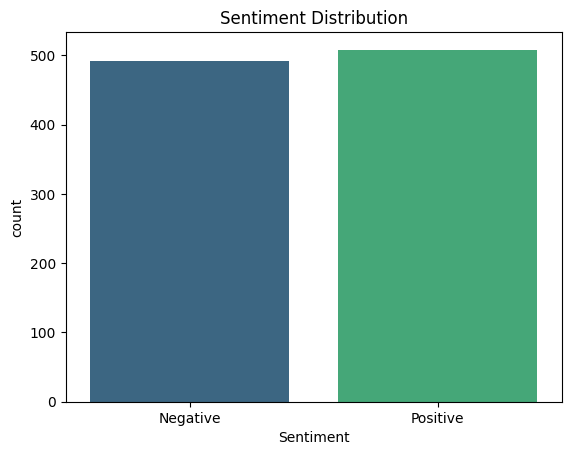

In [13]:
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.show()


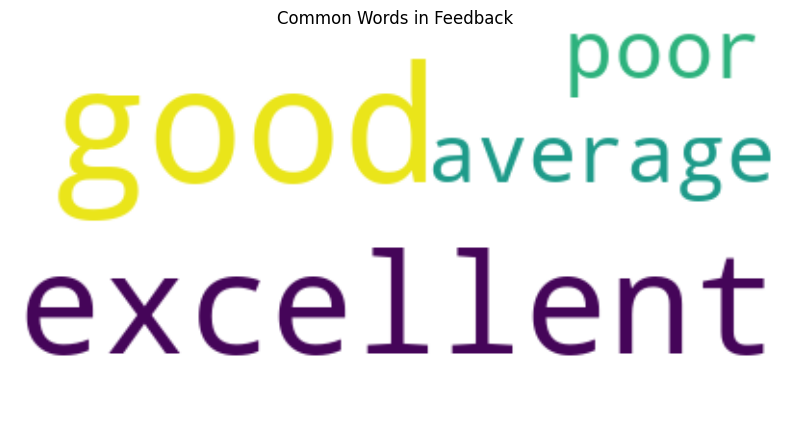

In [14]:
text = " ".join(df['Feedback'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Feedback')
plt.show()
